**Exogenous variables**

In [54]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg 
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect 
from skforecast.datasets import fetch_dataset
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

h2o_exog
--------
Monthly expenditure ($AUD) on corticosteroid drugs that the Australian health
system had between 1991 and 2008. Two additional variables (exog_1, exog_2) are
simulated.
Hyndman R (2023). fpp3: Data for Forecasting: Principles and Practice (3rd
Edition). http://pkg.robjhyndman.com/fpp3package/,
https://github.com/robjhyndman/fpp3package, http://OTexts.com/fpp3.
Shape of the dataset: (195, 3)


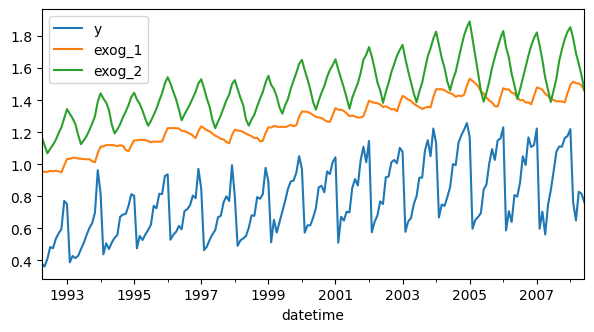

In [55]:
# Download data
# ==============================================================================
data = fetch_dataset(name='h2o_exog', raw=False)
data.index.name = 'datetime'

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(7, 3.5))
data.plot(ax=ax);

In [56]:
# Split data in train and test
# ==============================================================================
steps = 36
data_train = data.iloc[:-steps, :]
data_test  = data.iloc[-steps:, :]

**Recursive**

In [19]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=123, verbose=-1),
                 lags      = 15
             )

forecaster.fit(
    y    = data_train['y'],
    exog = data_train[['exog_1', 'exog_2']]
)

forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(random_state=123, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Differentiation order: None 
Exogenous included: True 
Exogenous variables names: ['exog_1', 'exog_2'] 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1} 
fit_kwargs: {} 
Creation date: 2024-10-24 11:47:55 
Last fi

In [20]:
# Predict
# ==============================================================================
steps = 36
predictions = forecaster.predict(
                  steps = steps,
                  exog  = data_test[['exog_1', 'exog_2']]
              )

predictions.head(3)

2005-07-01    1.023969
2005-08-01    1.044023
2005-09-01    1.110078
Freq: MS, Name: pred, dtype: float64

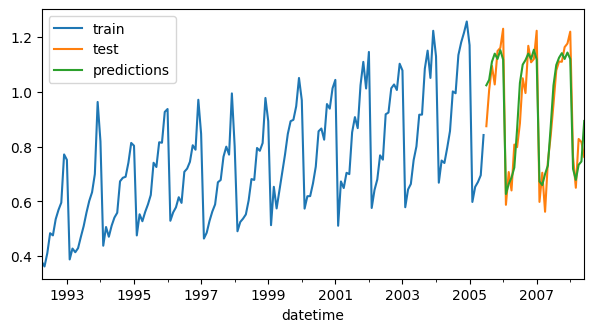

In [21]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(7, 3.5))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [33]:
data_train.head(20)

,y,exog_1,exog_2
datetime,,,
1992-04-01,0.379808,0.958792,1.166029
1992-05-01,0.361801,0.951993,1.117859
1992-06-01,0.410534,0.952955,1.067942
1992-07-01,0.483389,0.958078,1.097376
1992-08-01,0.475463,0.956370,1.122199
1992-09-01,0.534761,0.959610,1.153190
1992-10-01,0.568606,0.956205,1.194551
1992-11-01,0.595223,0.949715,1.231489
1992-12-01,0.771258,0.993219,1.289062


In [26]:
X_train, y = forecaster.create_train_X_y(
    y    = data_train['y'],
    exog   = data_train[['exog_1', 'exog_2']]
)

In [30]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,exog_1,exog_2
datetime,,,,,,,,,,,,,,,,,
1993-07-01,0.470126,0.428859,0.413890,0.427283,0.387554,0.751503,0.771258,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,1.032351,1.149874
1993-08-01,0.509210,0.470126,0.428859,0.413890,0.427283,0.387554,0.751503,0.771258,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,1.031335,1.176106
1993-09-01,0.558443,0.509210,0.470126,0.428859,0.413890,0.427283,0.387554,0.751503,0.771258,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,1.031964,1.213630
1993-10-01,0.601514,0.558443,0.509210,0.470126,0.428859,0.413890,0.427283,0.387554,0.751503,0.771258,0.595223,0.568606,0.534761,0.475463,0.483389,1.018133,1.254448
1993-11-01,0.632947,0.601514,0.558443,0.509210,0.470126,0.428859,0.413890,0.427283,0.387554,0.751503,0.771258,0.595223,0.568606,0.534761,0.475463,1.012943,1.300344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-01,1.170690,1.257238,1.216037,1.181011,1.134432,0.994864,1.001593,0.856803,0.795129,0.739986,0.749014,0.667989,1.130125,1.223235,1.050838,1.520544,1.784523
2005-03-01,0.597639,1.170690,1.257238,1.216037,1.181011,1.134432,0.994864,1.001593,0.856803,0.795129,0.739986,0.749014,0.667989,1.130125,1.223235,1.506290,1.678839
2005-04-01,0.652590,0.597639,1.170690,1.257238,1.216037,1.181011,1.134432,0.994864,1.001593,0.856803,0.795129,0.739986,0.749014,0.667989,1.130125,1.487660,1.569732


**Direct**

In [57]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregDirect(
                 regressor = LGBMRegressor(random_state=123, verbose=-1),
                 steps = 36,
                 lags = 15
             )

forecaster.fit(
    y    = data_train['y'],
    exog = data_train[['exog_1', 'exog_2']]
)

forecaster

ForecasterAutoregDirect 
Regressor: LGBMRegressor(random_state=123, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Window size: 15 
Maximum steps predicted: 36 
Exogenous included: True 
Exogenous variables names: ['exog_1', 'exog_2'] 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1} 
fit_kwargs: {} 
Creation date: 2024-10-24 12:23:37 
L

In [59]:
# Predict
# ==============================================================================
steps = 36
predictions = forecaster.predict(
                  steps = steps,
                  exog  = data_test[['exog_1', 'exog_2']]
              )

predictions.head(3)

2005-07-01    0.850219
2005-08-01    0.932038
2005-09-01    0.981891
Name: pred, dtype: float64

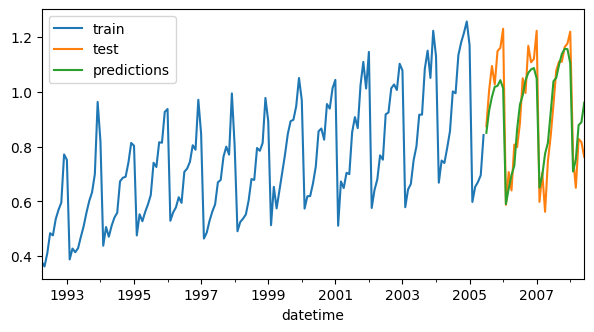

In [39]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(7, 3.5))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [ ]:
data_train.head(20)

,y,exog_1,exog_2
datetime,,,
1992-04-01,0.379808,0.958792,1.166029
1992-05-01,0.361801,0.951993,1.117859
1992-06-01,0.410534,0.952955,1.067942
1992-07-01,0.483389,0.958078,1.097376
1992-08-01,0.475463,0.956370,1.122199
1992-09-01,0.534761,0.959610,1.153190
1992-10-01,0.568606,0.956205,1.194551
1992-11-01,0.595223,0.949715,1.231489
1992-12-01,0.771258,0.993219,1.289062


In [53]:
X_train, y = forecaster.create_train_X_y(
    y    = data_train['y'],
    exog   = data_train[['exog_1', 'exog_2']]
)

In [52]:
X_train.columns

Index(['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8',
       'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15',
       'exog_1_step_1', 'exog_2_step_1', 'exog_1_step_2', 'exog_2_step_2',
       'exog_1_step_3', 'exog_2_step_3', 'exog_1_step_4', 'exog_2_step_4',
       'exog_1_step_5', 'exog_2_step_5', 'exog_1_step_6', 'exog_2_step_6',
       'exog_1_step_7', 'exog_2_step_7', 'exog_1_step_8', 'exog_2_step_8',
       'exog_1_step_9', 'exog_2_step_9', 'exog_1_step_10', 'exog_2_step_10',
       'exog_1_step_11', 'exog_2_step_11', 'exog_1_step_12', 'exog_2_step_12',
       'exog_1_step_13', 'exog_2_step_13', 'exog_1_step_14', 'exog_2_step_14',
       'exog_1_step_15', 'exog_2_step_15', 'exog_1_step_16', 'exog_2_step_16',
       'exog_1_step_17', 'exog_2_step_17', 'exog_1_step_18', 'exog_2_step_18',
       'exog_1_step_19', 'exog_2_step_19', 'exog_1_step_20', 'exog_2_step_20',
       'exog_1_step_21', 'exog_2_step_21', 'exog_1_step_22', 'exog_2_step